<h2>A2.2 LDA y Árboles de Decisión</h2>
<h3>Jesus Esteban Bustamante Apodaca</h3>

<h4>1. Importa los datos a tu ambiente de trabajo y separa los datos en entrenamiento y prueba,
con una relación que consideres adecuada, manteniendo un balance de clases.
Demuestra que se cumplió la condición imprimiendo datos relevantes en la consola</h4>

In [175]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


df = pd.read_csv('USA Housing Dataset.csv')
#Eliminacion de variables no relevantes
df = df.drop(columns=['date', 'street', 'city', 'statezip', 'country', 'yr_renovated'])

#Para la variabla de salida, seria el precio pero binarizado ya que no hay salidas binarias de interes en el datasheet
medianaPrecio = df['price'].median()
#Se crea una variable "HighPrice" que representa de manera binaria si el precio va mas alla de la mediana o no
df['HighPrice'] = (df['price'] > medianaPrecio).astype(int) 

# Caracteristicas (variables independientes) y la variable dependiente (precio)
X = df.drop(['HighPrice','price'], axis=1)
y = df['HighPrice']

# Dividir los datos en conjunto de entrenamiento y prueba (85% para entrenamiento, 15% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())


HighPrice
0    1790
1    1729
Name: count, dtype: int64
HighPrice
1    331
0    290
Name: count, dtype: int64


<h4>2. Corre una regresión logística simple con la función GLM de statsmodels con todas tus
variables de entrada e imprime el resumen del modelo en consola. Indica cuáles son las
2 variables más relevantes para este estudio y selecciónalas, eliminando todas las demás
variables de tus datos de entrenamiento y prueba</h4>

Viendo los resultados de la regresion logistica, las dos variables escogidas seran floors y bathrooms.


In [176]:
X_train_const = sm.add_constant(X_train)
# Modelo de regresión logística
# Ajustar el modelo de regresión logística usando GLM 
logit_model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()

# Imprimir el resumen del modelo
print(logit_model.summary())

# Seleccionamos solo las columnas relevantes para el modelo
X_train_selected = X_train[['bathrooms', 'floors']]
X_test_selected = X_test[['bathrooms', 'floors']]

# Verificamos que las columnas seleccionadas son las correctas
print(X_train_selected.head())
print(X_test_selected.head())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              HighPrice   No. Observations:                 3519
Model:                            GLM   Df Residuals:                     3508
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1745.8
Date:                Thu, 20 Mar 2025   Deviance:                       3491.6
Time:                        11:11:38   Pearson chi2:                 1.16e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3255
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            38.4962      3.938      9.777

<h4>3. Genera un modelo usando la metodología de linear discriminant analysis. Visualiza la
función discriminante con una gráfica de variable 1 vs variable 2, donde cada observación
tenga algo que la distinga dependiendo de su clase (por ejemplo, distinto color, distinto
marcador, etc.)</h4>

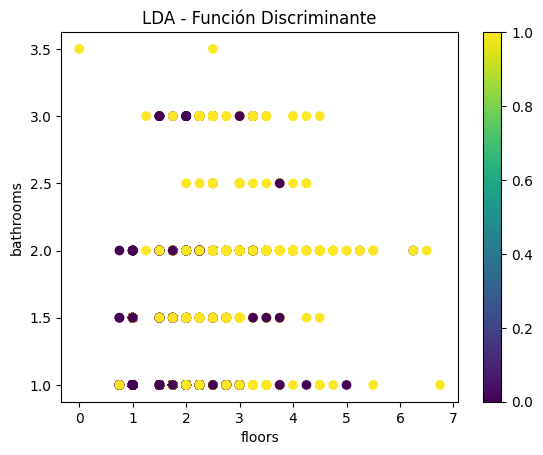

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Ajustar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

# Visualización de la función discriminante
plt.scatter(X_train_selected.iloc[:, 0], X_train_selected.iloc[:, 1], c=y_train)
plt.xlabel('floors')
plt.ylabel('bathrooms')
plt.title('LDA - Función Discriminante')
plt.colorbar()
plt.show()

<h4>4. Genera un modelo usando la metodología de árboles de decisión. Deberás podar el árbol,
habiendo seleccionado primero un valor óptimo de 𝛼 mediante una metodología de
LOOCV. Visualiza tanto el árbol resultante, como la partición en una gráfica de variable 1
vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su
clase.</h4>

Best alpha value: 0.01


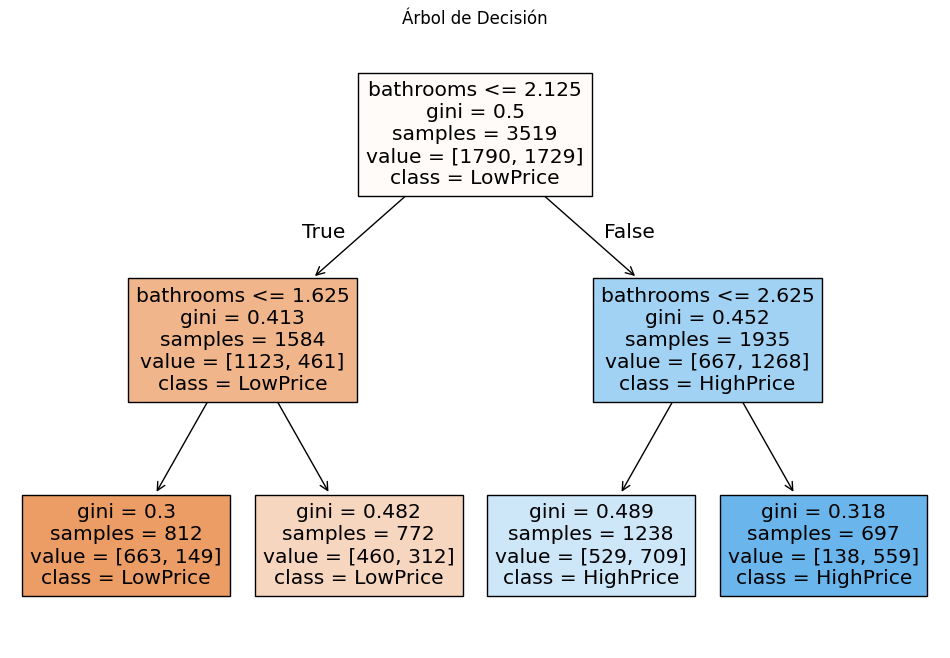

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Seleccionar solo las dos variables relevantes
X_train_tree = X_train_selected
X_test_tree = X_test_selected

# Ajustar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Buscar el mejor valor de alpha (complejidad de poda)
param_grid = {'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]}
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train_tree, y_train)

# Mejor valor de ccp_alpha
best_alpha = grid_search.best_params_['ccp_alpha']
print(f'Best alpha value: {best_alpha}')

# Entrenar el modelo con el mejor valor de alpha
best_tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_tree_model.fit(X_train_tree, y_train)

# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(best_tree_model, filled=True, feature_names=['bathrooms', 'floors'], class_names=['LowPrice', 'HighPrice'])
plt.title('Árbol de Decisión')
plt.show()

<h4>Codigo para comprobar si hay overfitting</h4>

Evaluación en datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      1790
           1       0.66      0.73      0.69      1729

    accuracy                           0.68      3519
   macro avg       0.68      0.68      0.68      3519
weighted avg       0.68      0.68      0.68      3519

Evaluación en datos de prueba:
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       290
           1       0.67      0.64      0.66       331

    accuracy                           0.64       621
   macro avg       0.64      0.64      0.64       621
weighted avg       0.64      0.64      0.64       621



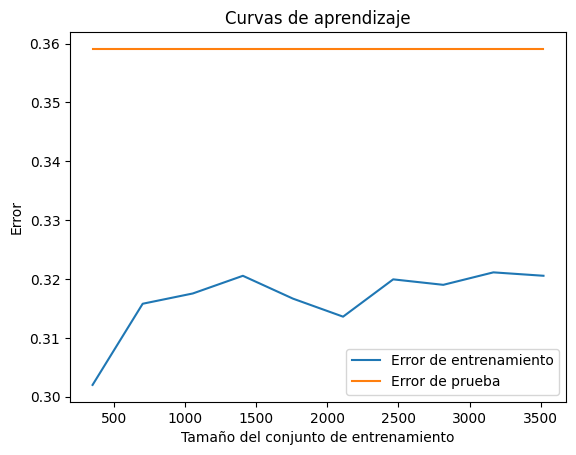

De acuerdo con los resultados, y comprobandolos con ChatGPT, el modelo no parece tener overfitting


In [179]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_tree_model.fit(X_train_tree, y_train)

# Predicciones en los datos de entrenamiento y prueba
y_train_pred = best_tree_model.predict(X_train_tree)
y_test_pred = best_tree_model.predict(X_test_tree)

# Evaluar rendimiento en los datos de entrenamiento
print("Evaluación en datos de entrenamiento:")
print(classification_report(y_train, y_train_pred))

# Evaluar rendimiento en los datos de prueba
print("Evaluación en datos de prueba:")
print(classification_report(y_test, y_test_pred))

# Puedes graficar las curvas de aprendizaje para ver cómo cambian los rendimientos
import matplotlib.pyplot as plt

train_sizes = [int(len(X_train_selected) * 0.1 * i) for i in range(1, 11)]
train_errors, test_errors = [], []

for train_size in train_sizes:
    X_train_sub = X_train_selected[:train_size]
    y_train_sub = y_train[:train_size]
    best_tree_model.fit(X_train_sub, y_train_sub)
    
    # Errores en entrenamiento y prueba
    train_errors.append(1 - best_tree_model.score(X_train_sub, y_train_sub))
    test_errors.append(1 - best_tree_model.score(X_test_tree, y_test))
    
# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_errors, label="Error de entrenamiento")
plt.plot(train_sizes, test_errors, label="Error de prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error")
plt.title("Curvas de aprendizaje")
plt.legend()
plt.show()
print("De acuerdo con los resultados, y comprobandolos con ChatGPT, el modelo no parece tener overfitting")

<h4>5. Calcula, para ambos modelos, todas las métricas revisadas en clase en los datos de
prueba. Indica qué opinas sobre los resultados, especificando si crees que uno de los dos
modelos es mejor para esta tarea específica.</h4>

Viendo los resultados de la precision, recall, y el f1-score, se puede ver que ambos modelos realmente tienen resultados parecidos, la presicion de ambos es un resultado cercano a 0.64, con el arbol de decision teniendo un poco mas de presicion muy ligeramente. Aparte de la presicion se puede ver que el F1-score y el recall tienen un mejor desempeño en el arbol de decision. En conclusion, se puede concluir que aunque la diferencia es minima, el Arbol de Decision prueba ser mejor modelo que el de regresion Logistica para la prediccion de altos o bajos precios de una vivienda en Estados Unidos.

In [180]:
from sklearn.metrics import classification_report, accuracy_score

#Modelo de Regresion Logistica con las variables seleccionadas
X_train_const_selected = sm.add_constant(X_train_selected)
X_test_logit_selected = sm.add_constant(X_test_selected)

# Ajustar el modelo de regresión logística usando GLM (Modelo Lineal Generalizado con familia binomial)
logit_model_selected = sm.GLM(y_train, X_train_const_selected, family=sm.families.Binomial()).fit()

# Asegurarnos de que las mismas columnas sean utilizadas para la predicción
X_test_logit = sm.add_constant(X_test[['bathrooms', 'floors']])  # Usar las mismas variables

# Verificar las dimensiones de los datos de prueba antes de la predicción
print(X_test_logit.shape)

# Realizar las predicciones en los datos de prueba
y_pred_logit = logit_model_selected.predict(X_test_logit)

# Convertir probabilidades en clases (si la predicción es mayor a 0.5, se considera '1', si no '0')
y_pred_logit_class = (y_pred_logit > 0.5).astype(int)

# Evaluar el rendimiento en los datos de prueba para la regresión logística
print("Evaluación en datos de prueba para Regresión Logística:")
print(classification_report(y_test, y_pred_logit_class))

# Calcular el accuracy de la regresión logística
accuracy_logit = accuracy_score(y_test, y_pred_logit_class)
print(f"Accuracy de la regresión logística: {accuracy_logit}")

# Predicciones para el árbol de decisión en los datos de prueba
y_pred_tree = best_tree_model.predict(X_test_selected)

# Evaluar el rendimiento en los datos de prueba para el árbol de decisión
print("Evaluación en datos de prueba para Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))

# Calcular el accuracy del árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy del árbol de decisión: {accuracy_tree}")

(621, 3)
Evaluación en datos de prueba para Regresión Logística:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       290
           1       0.68      0.60      0.64       331

    accuracy                           0.64       621
   macro avg       0.64      0.64      0.64       621
weighted avg       0.64      0.64      0.64       621

Accuracy de la regresión logística: 0.6360708534621579
Evaluación en datos de prueba para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       290
           1       0.67      0.64      0.66       331

    accuracy                           0.64       621
   macro avg       0.64      0.64      0.64       621
weighted avg       0.64      0.64      0.64       621

Accuracy del árbol de decisión: 0.6409017713365539
